<a href="https://colab.research.google.com/github/MisbahNaeem/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic classification: Classify images of clothing**

Project is being develope on Google Colab.In this project, a neural network has been trained  with the help of Fashion MNIST dataset available publicaly at https://github.com/zalandoresearch/fashion-mnist.

This Project has been developed with the help of tutorial available at site https://www.tensorflow.org/tutorials/keras/classification under Supervision of Mr.Muhammad Ali Shafique(Lecturer,EED UET Lahore) https://colab.research.google.com/github/alinspiron/Fashion-MNIST/blob/master/Fashion_MNIST.ipynb#scrollTo=mtRau3St-s0M






 **Download and Import libraries and check the version of tensor flow**


In [0]:
pip uninstall tensorflow

In [0]:
pip install tensorflow==2.1.0

In [0]:
import tensorflow as tf
from tensorflow import keras
#other libraries
import numpy as np
import matplotlib.pyplot as plt
#check version of tensorflow
print(tf.__version__)

2.1.0


**import Fashion MNIST dataset from **https://github.com/zalandoresearch/fashion-mnist**



In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images , train_label),(test_images , test_label) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore Data**

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
len(test_images)

10000

In [0]:
len(train_label)

60000

In [0]:
len(test_label)

10000

**Preprocess the Dataset**

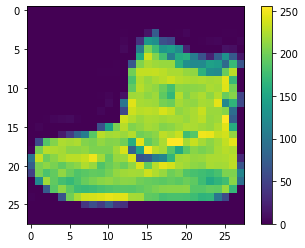

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

In [0]:
train_images=train_images/255
test_images=test_images/255

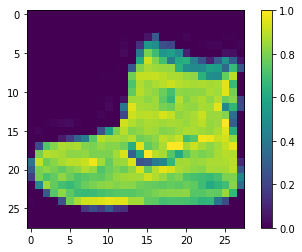

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()

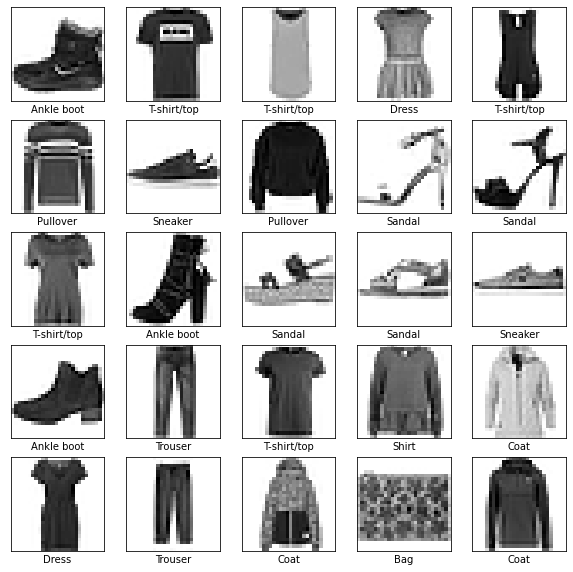

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_label[i]])
plt.show()

**Build the Model**

In [0]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


**Compile the Model**

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images,train_label,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4970 - accuracy: 0.8258
Epoch 2/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3774 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3401 - accuracy: 0.8775
Epoch 4/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3138 - accuracy: 0.8855
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2971 - accuracy: 0.8906
Epoch 6/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2819 - accuracy: 0.8960
Epoch 7/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2701 - accuracy: 0.9009
Epoch 8/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2576 - accuracy: 0.9043
Epoch 9/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2493 - accuracy: 0.9072
Epoch 10/10
60

**Evaluate the Accuracy**

In [0]:
test_loss,test_acc=model.evaluate(test_images,test_label)
print('\nTest Accuracy:',test_acc)
print("\nTest Loss:",test_loss)


10000/10000 [==============================] - 0s 44us/sample - loss: 0.3503 - accuracy: 0.8777

Test Accuracy: 0.8777

Test Loss: 0.35034648473262786


In [0]:
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [0]:
predictions=probability_model.predict(test_images)
print(predictions[1])

[3.3223350e-05 3.7623022e-14 9.9744284e-01 6.8485877e-12 2.3548866e-03
 3.6473723e-12 1.6912323e-04 2.4177435e-15 1.4647780e-11 3.6490574e-19]


In [0]:
np.argmax(predictions[1])

2

**Verify Predictions**

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


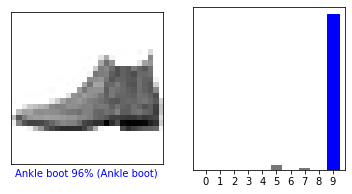

In [0]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_label,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_label)
plt.show()